<a href="https://colab.research.google.com/github/11madhumita/Image_To_Text/blob/master/huggingface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q transformers

In [4]:
from transformers import pipeline
from transformers import ViTFeatureExtractor,ViTForImageClassification
from IPython.display import Image,display
from PIL import Image as img


In [5]:
caption=pipeline('image-to-text')
FILE_NAME = 'cat.jpg'

No model was supplied, defaulted to ydshieh/vit-gpt2-coco-en and revision 5bebf1e (https://huggingface.co/ydshieh/vit-gpt2-coco-en).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.34k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.47.1"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_rang

tokenizer_config.json:   0%|          | 0.00/236 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/211 [00:00<?, ?B/s]

Device set to use cpu


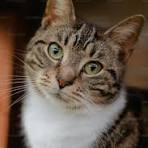

In [6]:
display(Image(FILE_NAME,width=700,height=400))

In [7]:
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model=ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [8]:
image_array=img.open('cat.jpg')
inputs = feature_extractor(images = image_array,return_tensors="pt")
outputs= model(**inputs)
logits=outputs.logits

In [9]:
logits.shape

torch.Size([1, 1000])

In [10]:
predicted_class_idx = logits.argmax(-1).item()

In [11]:
print(predicted_class_idx)

281


In [12]:

print("Predicted class:",model.config.id2label[predicted_class_idx])

Predicted class: tabby, tabby cat


In [ ]:
import warnings,logging
warnings.simplefilter('ignore')
logging.disable(logging.WARNING)
caption('cat.jpg')

[{'generated_text': 'a cat is sitting on a bed '}]

In [ ]:
FILE='dog.jpg'

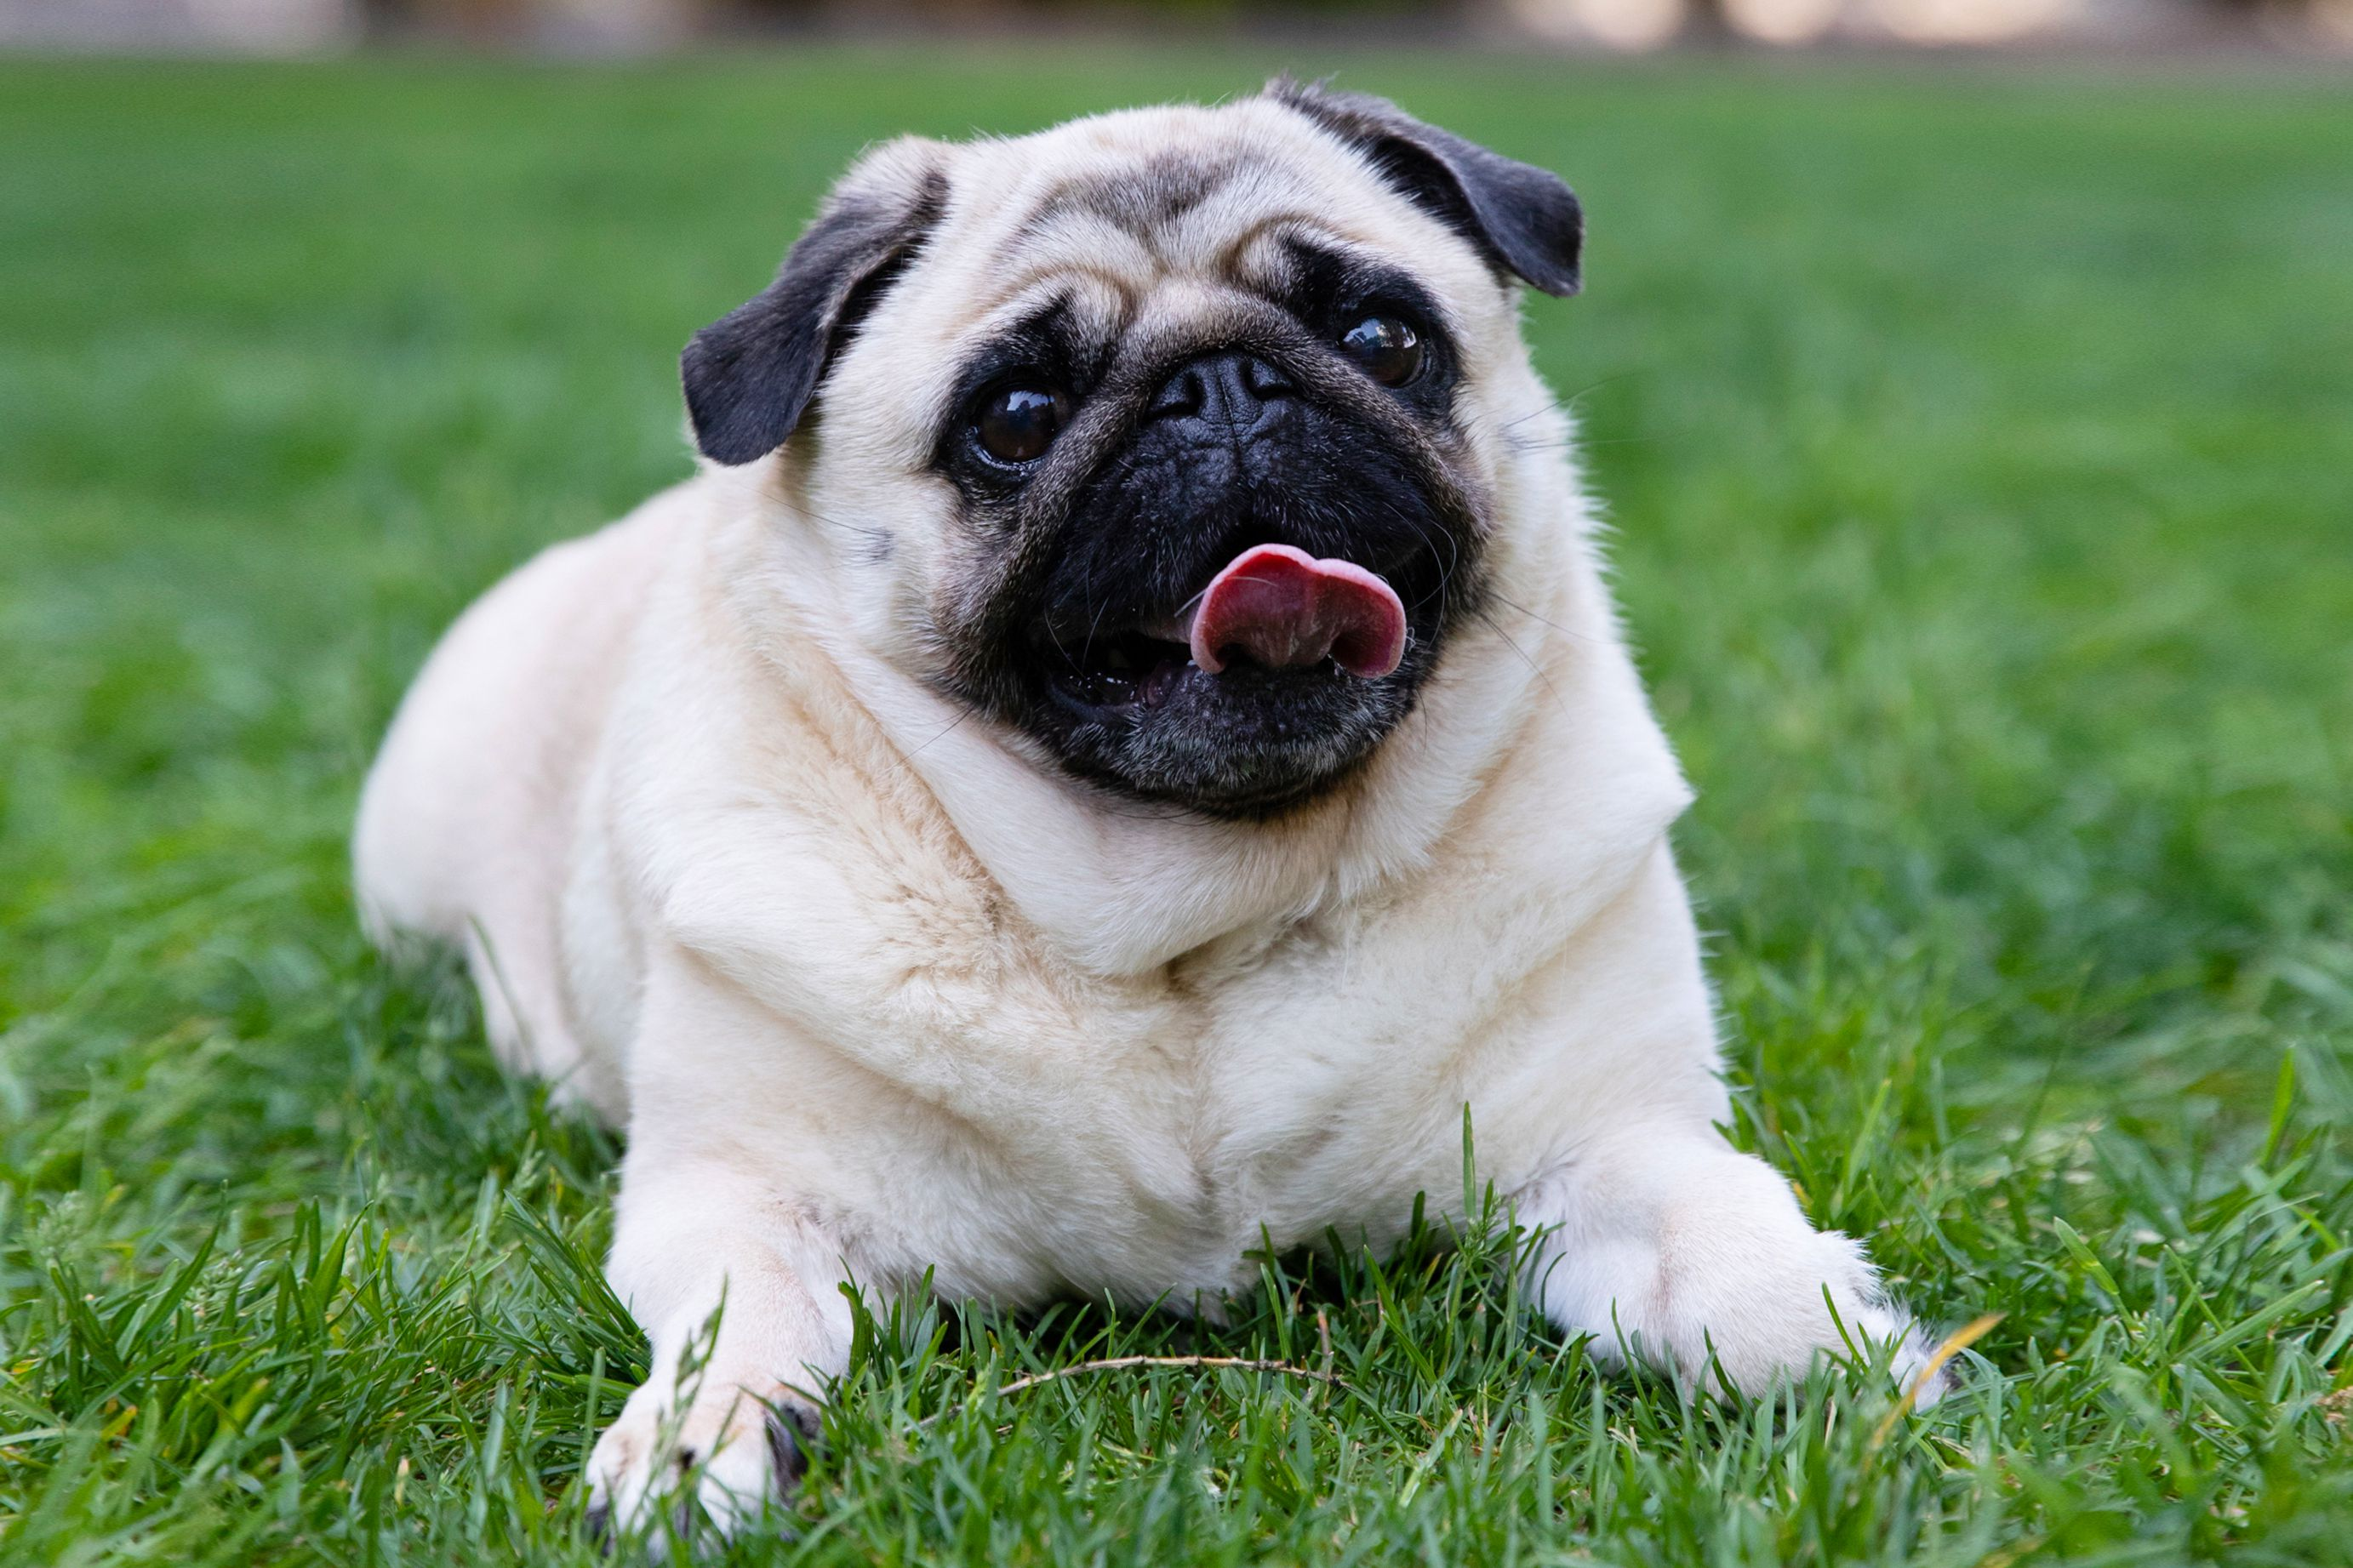

In [ ]:
display(Image(FILE,width=700,height=400))

In [ ]:
image_array=img.open('dog.jpg')
inputs = feature_extractor(images = image_array,return_tensors="pt")
outputs= model(**inputs)
logits=outputs.logits

In [ ]:
logits.shape

torch.Size([1, 1000])

In [ ]:
predicted_class_idx = logits.argmax(-1).item()

In [ ]:
print(predicted_class_idx)

254


In [ ]:
print("Predicted class:",model.config.id2label[predicted_class_idx])

Predicted class: pug, pug-dog


In [ ]:
file='download.jpg'

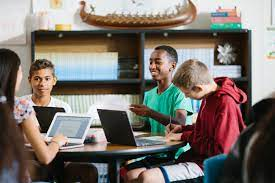

In [ ]:
display(Image(file,width=700,height=400))

In [ ]:
image_array=img.open('download.jpg')
inputs = feature_extractor(images = image_array,return_tensors="pt")
outputs= model(**inputs)
logits=outputs.logits

In [ ]:
logits.shape

torch.Size([1, 1000])

In [ ]:
predicted_class_idx = logits.argmax(-1).item()

In [ ]:
print(predicted_class_idx)

624


In [ ]:
print("Predicted class:",model.config.id2label[predicted_class_idx])



Predicted class: library


In [ ]:
FILE_NAME = 'flower.jpg'

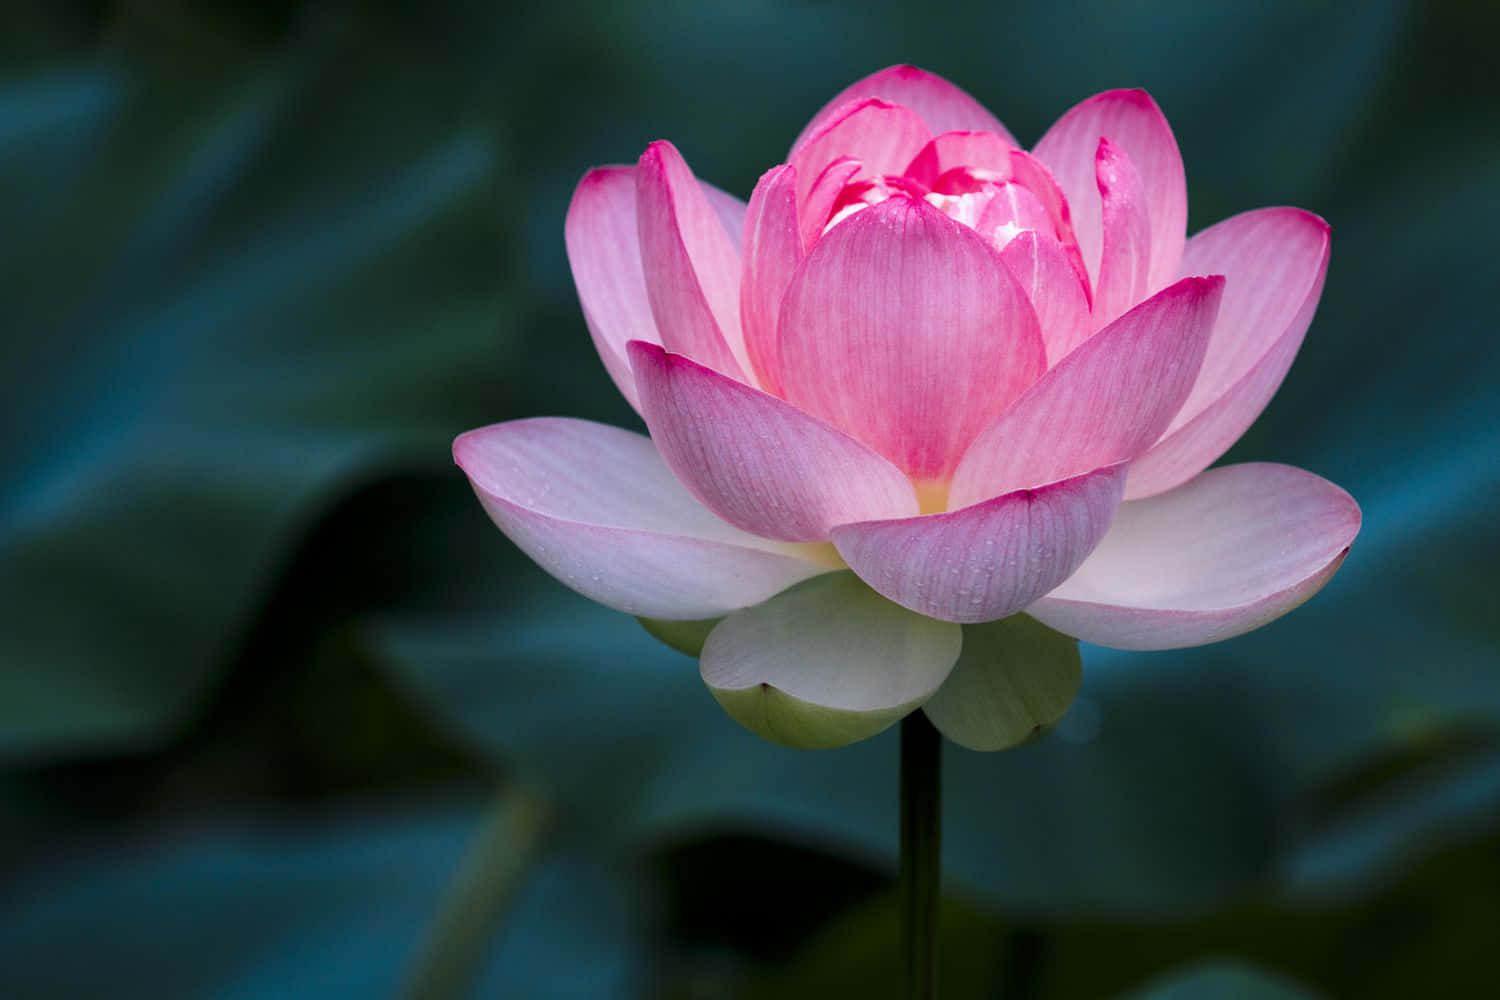

In [ ]:
display(Image(FILE_NAME,width=700,height=400))

In [ ]:
image_array=img.open('flower.jpg')
inputs = feature_extractor(images = image_array,return_tensors="pt")
outputs= model(**inputs)
logits=outputs.logits

In [ ]:
predicted_class_idx = logits.argmax(-1).item()

In [ ]:
print(predicted_class_idx)

985


In [ ]:
print("Predicted class:",model.config.id2label[predicted_class_idx])

Predicted class: daisy
